# IPL WIN PREDICTOR

### Import basic pakages 

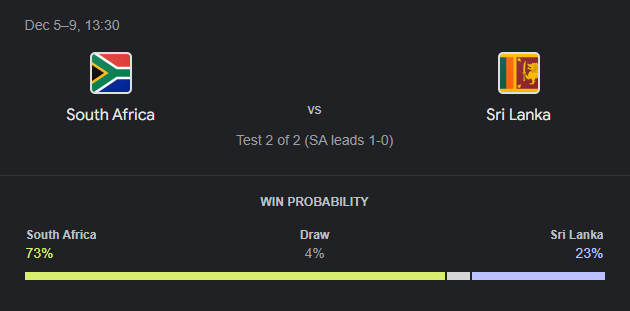

# Table of Contents
- [Introduction](#introduction)
  - [Data Loading](#data-loading)
  - [Data preprocessing](#data-preprocessing)
  - [Feature-Selection](#Feature-Selection)
  - [Encoding And Model Training](#Encoding-And-Training)
    - [Train-Test-split](#Train-Test-split)
    - [One Hot Encoding](#One-Hot-Encoding)
    - [Logestic Regration](#Logestic-Regration)
      - [Cross validation](#Cross-validation)
    - [SVM Clasifer](#SVM-Clasifer)
      - [Cross-validation(svm)](#Cross-validation(svm))
  - [Evaluation](#Evaluation)
  - [Save Models](#Save-Models)
  - [Application](#Application)



In [1]:
import numpy as np;
import pandas as pd;
from sklearn.model_selection import  train_test_split

# Data-loading

In [2]:
match = pd.read_csv('matches.csv')
delilveries= pd.read_csv('deliveries.csv')

In [3]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
delilveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


##### shape of data set 

In [5]:
match.shape

(1095, 20)

In [6]:
delilveries.shape

(260920, 17)

# Data-preprocessing

In [7]:
total_score_df = delilveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


#### first innings score 

In [8]:
total_score_df= total_score_df[total_score_df['inning']==1]
total_score_df# Filter the DataFrame to include only rows where the value of the 'inning' column is equal to 1.
# This ensures we are analyzing data for the first innings only.
total_score_df = total_score_df[total_score_df['inning'] == 1]

# Display the filtered DataFrame to verify the results.
total_score_df


,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [9]:
# Merge the 'match' DataFrame with a subset of the 'total_score_df' DataFrame.
# The subset includes only the 'match_id' and 'total_runs' columns.
# Perform the merge operation where 'id' in the 'match' DataFrame matches 'match_id' in the 'total_score_df'.
match_df = match.merge(
    total_score_df[['match_id', 'total_runs']],  # Selecting relevant columns from 'total_score_df'.
    left_on='id',                               # Specify the key column in the 'match' DataFrame for the merge.
    right_on='match_id'                         # Specify the key column in the 'total_score_df' for the merge.
)


In [10]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [11]:
match_df["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [13]:
# Update 'team1' and 'team2' column values to reflect the latest team names.

# Replace 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1' column.
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')

# Replace 'Delhi Daredevils' with 'Delhi Capitals' in the 'team2' column.
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

# Replace 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team1' column.
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

# Replace 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team2' column.
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')


In [14]:
# Filter the DataFrame to include only the rows where 'team1' is in the 'teams' list.
match_df = match_df[match_df['team1'].isin(teams)]

# Filter the DataFrame to include only the rows where 'team2' is in the 'teams' list.
match_df = match_df[match_df['team2'].isin(teams)]


In [15]:
match_df["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings'], dtype=object)

In [16]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [17]:
match_df=match_df[['match_id','city','winner','total_runs']]# Select specific columns from the match_df DataFrame
match_df

,match_id,city,winner,total_runs
0,335982,Bangalore,Kolkata Knight Riders,222
1,335983,Chandigarh,Chennai Super Kings,240
2,335984,Delhi,Delhi Daredevils,129
3,335985,Mumbai,Royal Challengers Bangalore,165
4,335986,Kolkata,Kolkata Knight Riders,110
...,...,...,...,...
1083,1426298,Kolkata,Kolkata Knight Riders,157
1084,1426299,Chennai,Chennai Super Kings,141
1091,1426309,Ahmedabad,Kolkata Knight Riders,159
1093,1426311,Chennai,Sunrisers Hyderabad,175


In [18]:
delivery_df=match_df.merge(delilveries,on='match_id')# Merge the match_df DataFrame with the deliveries DataFrame on the 'match_id' column
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [19]:
delivery_df= delivery_df[delivery_df['inning']==2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN


In [20]:
delivery_df['total_runs_y']= pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')
delivery_df 

#check the data type of the column
print(delivery_df['total_runs_y'].dtype)
#print(delivery_df['total_runs_x'].dtype)

#Apply the cumulative sum with numaric_only set to true 
delivery_df['current_score']= delivery_df.groupby('match_id')['total_runs_y'].cumsum(numeric_only=True)
delivery_df['current_score']

int64


124         1
125         2
126         2
127         3
128         4
         ... 
199873    110
199874    111
199875    112
199876    113
199877    114
Name: current_score, Length: 96385, dtype: int64

In [21]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4


In [22]:
#runRate 
delivery_df['runs_left']= delivery_df['total_runs_x']-delivery_df['current_score']

In [23]:
delivery_df['balls_left']=120-(delivery_df['over']*6+delivery_df['ball']) #Ball left 

In [24]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,115


In [25]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder',
       'current_score', 'runs_left', 'balls_left'],
      dtype='object')

In [26]:
delivery_df["player_dismissed"]

124       NaN
125       NaN
126       NaN
127       NaN
128       NaN
         ... 
199873    NaN
199874    NaN
199875    NaN
199876    NaN
199877    NaN
Name: player_dismissed, Length: 96385, dtype: object

In [27]:
# Fill NaN values with "0" for specific columns using .loc
delivery_df.loc[:, 'player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df.loc[:, 'fielder'] = delivery_df['fielder'].fillna("0")
delivery_df.loc[:, 'dismissal_kind'] = delivery_df['dismissal_kind'].fillna("0")

# Convert 'player_dismissed' to int directly, setting to 1 if not "0"
delivery_df.loc[:, 'player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 1 if x != "0" else 0)

# Ensure 'player_dismissed' is of integer type
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)
# Print the data type of 'player_dismissed' to verify it's an integer type
print(delivery_df['player_dismissed'].dtype)

# Calculate the cumulative sum of 'player_dismissed' grouped by 'match_id'
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# Calculate the remaining wickets based on the total (10 - cumulative wickets)
delivery_df['wickets'] = 10 - wickets

# Display the first few rows of the updated DataFrame
print(delivery_df.head())

int64
     match_id       city                 winner  total_runs_x  inning  \
124    335982  Bangalore  Kolkata Knight Riders           222       2   
125    335982  Bangalore  Kolkata Knight Riders           222       2   
126    335982  Bangalore  Kolkata Knight Riders           222       2   
127    335982  Bangalore  Kolkata Knight Riders           222       2   
128    335982  Bangalore  Kolkata Knight Riders           222       2   

                    batting_team           bowling_team  over  ball    batter  \
124  Royal Challengers Bangalore  Kolkata Knight Riders     0     1  R Dravid   
125  Royal Challengers Bangalore  Kolkata Knight Riders     0     2  W Jaffer   
126  Royal Challengers Bangalore  Kolkata Knight Riders     0     3  W Jaffer   
127  Royal Challengers Bangalore  Kolkata Knight Riders     0     4  W Jaffer   
128  Royal Challengers Bangalore  Kolkata Knight Riders     0     5  R Dravid   

     ... total_runs_y extras_type  is_wicket  player_dismissed  \
12

In [28]:
# Calculate Current Run Rate (CRR)
# CRR formula: (Current Score * 6) / (Total Overs - Overs Remaining)
# Total Overs in a limited overs cricket match is typically 120 for T20s.
# Here, 'balls_left' should represent the remaining balls in the innings.
delivery_df.loc[:, 'crr'] = np.where(
    (120 - delivery_df['balls_left']) > 0,  # Check if balls left is greater than 0
    (delivery_df['current_score'] * 6) / (120 - delivery_df['balls_left']),  # Calculate CRR
    0  # Set to 0 or np.nan if division by zero would occur
)


In [29]:
# Calculate Required Run Rate (RRR)
# RRR formula: (Runs Left * 6) / Balls Left
# Here, 'run_left' represents the runs needed to win, and 'balls_left' is the number of balls remaining.
delivery_df.loc[:, 'rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left']


In [30]:
# Define the function to determine match result
def result(row):
    """Return 1 if batting_team is the winner, otherwise return 0."""
    return 1 if row['batting_team'] == row['winner'] else 0

In [31]:
# Apply the function to each row
delivery_df['Win'] = delivery_df.apply(result, axis=1)

In [32]:
# Replace infinity values with NaN
delivery_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
delivery_df.dropna(axis=0, inplace=True)

# Reset the index if needed
delivery_df.reset_index(drop=True, inplace=True)

print(delivery_df)

      match_id       city                 winner  total_runs_x  inning  \
0       335982  Bangalore  Kolkata Knight Riders           222       2   
1       335982  Bangalore  Kolkata Knight Riders           222       2   
2       335982  Bangalore  Kolkata Knight Riders           222       2   
3       335982  Bangalore  Kolkata Knight Riders           222       2   
4       335982  Bangalore  Kolkata Knight Riders           222       2   
...        ...        ...                    ...           ...     ...   
4819   1426312    Chennai  Kolkata Knight Riders           113       2   
4820   1426312    Chennai  Kolkata Knight Riders           113       2   
4821   1426312    Chennai  Kolkata Knight Riders           113       2   
4822   1426312    Chennai  Kolkata Knight Riders           113       2   
4823   1426312    Chennai  Kolkata Knight Riders           113       2   

                     batting_team           bowling_team  over  ball  \
0     Royal Challengers Bangalore  Kolk

In [33]:
# Define columns to delete
columns_to_delete = ['match_id', 'winner', 'inning', 'over', 'ball']

# Create a reduced DataFrame without specified columns
reduced_df = delivery_df.drop(columns=columns_to_delete)

In [34]:
reduced_df.columns.to_numpy()

array(['city', 'total_runs_x', 'batting_team', 'bowling_team', 'batter',
       'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs_y', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'current_score', 'runs_left',
       'balls_left', 'wickets', 'crr', 'rrr', 'Win'], dtype=object)

# Feature-Selection

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preprocess the data if necessary


# Select the columns you want to use for PCA
selected_columns = [ 'batting_team',
                    'bowling_team',
                    'city',
                    'runs_left',
                    'balls_left',
                    'wickets',
                    'total_runs_x',
                    'crr','rrr',
                    'Win',
                    'batter', 
                    'non_striker',
                    'bowler',
                    'batsman_runs',
                    'extra_runs',
                    'total_runs_y',
                    'player_dismissed',
                    'dismissal_kind',
                    'fielder',
                    'current_score',
                    'extras_type']

# Identify which columns in selected_columns exist in reduced_df
existing_columns = [col for col in selected_columns if col  in reduced_df.columns]

# # Subset the data using only the columns that exist in reduced_df
data_subset = reduced_df[existing_columns]



# Display the columns in data_subset to confirm
existing_columns




['batting_team',
 'bowling_team',
 'city',
 'runs_left',
 'balls_left',
 'wickets',
 'total_runs_x',
 'crr',
 'rrr',
 'Win',
 'batter',
 'non_striker',
 'bowler',
 'batsman_runs',
 'extra_runs',
 'total_runs_y',
 'player_dismissed',
 'dismissal_kind',
 'fielder',
 'current_score',
 'extras_type']

In [36]:
print(data_subset.dtypes)

batting_team         object
bowling_team         object
city                 object
runs_left             int64
balls_left            int64
wickets               int64
total_runs_x          int64
crr                 float64
rrr                 float64
Win                   int64
batter               object
non_striker          object
bowler               object
batsman_runs          int64
extra_runs            int64
total_runs_y          int64
player_dismissed      int64
dismissal_kind       object
fielder              object
current_score         int64
extras_type          object
dtype: object


- Label Hot Encoding

In [37]:
# Convert categorical columns to numerical labels using label encoding
label_encoder = LabelEncoder()                  
for col in data_subset.columns:
    if data_subset[col].dtype == 'object':
        data_subset[col] = label_encoder.fit_transform(data_subset[col])

C:\Users\parak\AppData\Local\Temp\ipykernel_12420\2958266783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = label_encoder.fit_transform(data_subset[col])
C:\Users\parak\AppData\Local\Temp\ipykernel_12420\2958266783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = label_encoder.fit_transform(data_subset[col])
C:\Users\parak\AppData\Local\Temp\ipykernel_12420\2958266783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [38]:
print(data_subset.dtypes)

batting_team          int64
bowling_team          int64
city                  int64
runs_left             int64
balls_left            int64
wickets               int64
total_runs_x          int64
crr                 float64
rrr                 float64
Win                   int64
batter                int64
non_striker           int64
bowler                int64
batsman_runs          int64
extra_runs            int64
total_runs_y          int64
player_dismissed      int64
dismissal_kind        int64
fielder               int64
current_score         int64
extras_type           int64
dtype: object


In [39]:
data_subset

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,Win,...,non_striker,bowler,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,extras_type
0,8,5,2,220,118,10,222,6.000000,11.186441,0,...,275,15,0,1,1,0,0,0,2,4
1,8,5,2,214,111,9,222,5.333333,11.567568,0,...,396,118,0,4,4,0,0,0,8,1
2,8,5,2,211,103,8,222,3.882353,12.291262,0,...,151,15,0,1,1,0,0,0,11,4
3,8,5,2,206,98,8,222,4.363636,12.612245,0,...,396,118,0,1,1,0,0,0,16,1
4,8,5,2,194,80,6,222,4.200000,14.550000,0,...,73,14,0,1,1,0,0,0,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,5,9,8,75,101,9,113,12.000000,4.455446,1,...,393,324,0,1,1,0,0,0,38,4
4820,5,9,8,70,98,9,113,11.727273,4.285714,1,...,393,324,0,1,1,0,0,0,43,4
4821,5,9,8,37,82,9,113,12.000000,2.707317,1,...,393,312,0,4,4,0,0,0,76,0
4822,5,9,8,29,79,9,113,12.292683,2.202532,1,...,307,312,0,1,1,0,0,0,84,1


- feature scaling

In [40]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Apply PCA with 10 components
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(data_scaled)

column_mapping = {f'PC{i+1}': col for i, col in enumerate(data_subset.columns)}

final_df = pd.DataFrame(data_reduced, columns=[column_mapping.get(f'PC{i+1}') for i in range(10)])
# Convert the reduced data back to a DataFrame
#reduced_df = pd.DataFrame(data_reduced, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

final_df


,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,Win
0,2.951015,0.422946,-1.354241,2.234677,0.513050,-1.574846,0.284875,0.867774,-0.318526,-1.151347
1,2.695712,-0.030617,2.660173,3.638408,-0.625256,-0.571637,1.224409,-1.065991,-1.282758,-0.423167
2,2.219949,0.358355,-1.637151,2.235343,-0.497421,-1.825327,-0.374382,0.915706,-0.820786,-1.291362
3,2.078786,0.270075,-1.205572,2.490098,-0.866818,0.338943,1.875643,0.648182,0.322557,-0.616147
4,1.093970,0.245648,-1.711617,2.304998,-0.964873,-1.366294,-0.024880,1.102021,-0.844157,-1.654822
...,...,...,...,...,...,...,...,...,...,...
4819,1.333844,-0.026113,0.356520,-1.908723,1.941927,1.329325,0.288939,0.520594,-0.791047,0.978800
4820,1.215904,-0.041255,0.347673,-1.968306,1.868376,1.333894,0.287208,0.519266,-0.800368,0.994413
4821,0.456371,-0.623835,4.727135,-0.837846,0.778626,1.663386,0.867288,-1.439512,-1.514924,0.462257
4822,0.140658,-0.292736,0.912520,-2.205989,1.651738,1.025861,-0.197561,0.116987,-0.782412,0.460227


In [41]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,Win
0,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,0,2,220,118,10,6.000000,11.186441,0
1,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,V Kohli,...,0,0,0,8,214,111,9,5.333333,11.567568,0
2,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,5,W Jaffer,...,0,0,0,11,211,103,8,3.882353,12.291262,0
3,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,3,4,JH Kallis,...,0,0,0,16,206,98,8,4.363636,12.612245,0
4,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,6,4,MV Boucher,...,0,0,0,28,194,80,6,4.200000,14.550000,0


# Encoding-And-Training

In [42]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','Win']]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,Win
0,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,118,10,222,6.000000,11.186441,0
1,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,214,111,9,222,5.333333,11.567568,0
2,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,211,103,8,222,3.882353,12.291262,0
3,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,206,98,8,222,4.363636,12.612245,0
4,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,194,80,6,222,4.200000,14.550000,0
...,...,...,...,...,...,...,...,...,...,...
4819,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,75,101,9,113,12.000000,4.455446,1
4820,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,70,98,9,113,11.727273,4.285714,1
4821,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,37,82,9,113,12.000000,2.707317,1
4822,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,29,79,9,113,12.292683,2.202532,1


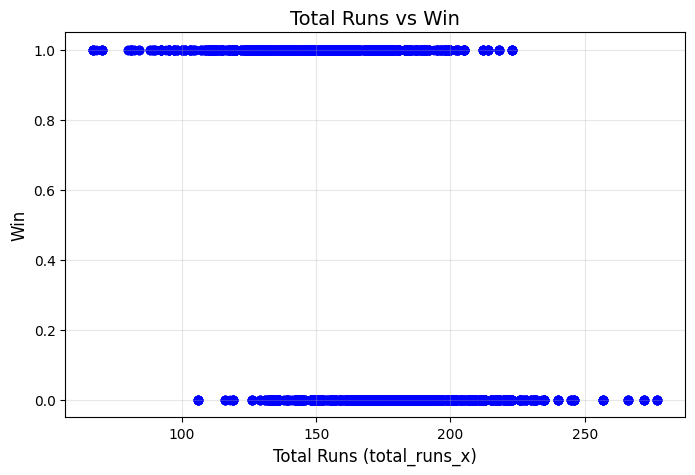

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(final_df['total_runs_x'], final_df['Win'], color='blue', alpha=0.7)
plt.title('Total Runs vs Win', fontsize=14)
plt.xlabel('Total Runs (total_runs_x)', fontsize=12)
plt.ylabel('Win', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


In [44]:
final_df= final_df.sample(final_df.shape[0])# Shuffle the rows of the dataframe to randomize the order


In [45]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,Win
1094,Delhi Daredevils,Kolkata Knight Riders,Kolkata,121,76,9,181,8.181818,9.552632,0
2259,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,15,5,4,170,8.086957,18.000000,0
2189,Chennai Super Kings,Mumbai Indians,Kolkata,142,107,7,148,2.769231,7.962617,0
3993,Rajasthan Royals,Chennai Super Kings,Mumbai,45,3,2,188,7.333333,90.000000,0
4192,Kolkata Knight Riders,Royal Challengers Bangalore,Sharjah,38,47,7,138,8.219178,4.851064,1


# Train-Test-split 

In [46]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [47]:
X_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
1970,Mumbai Indians,Rajasthan Royals,Jaipur,92,12,1,179,4.833333,46.000000
1585,Delhi Daredevils,Mumbai Indians,Mumbai,78,106,10,92,6.000000,4.415094
423,Chennai Super Kings,Kings XI Punjab,Mumbai,14,38,9,112,7.170732,2.210526
1340,Deccan Chargers,Mumbai Indians,Hyderabad,47,10,3,172,6.818182,28.200000
3650,Mumbai Indians,Kings XI Punjab,Mumbai,89,41,6,197,8.202532,13.024390


In [48]:
X_test.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
2773,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,92,105,10,135,17.200000,5.257143
3430,Kings XI Punjab,Kolkata Knight Riders,Indore,126,48,6,245,9.916667,15.750000
3921,Delhi Capitals,Royal Challengers Bangalore,Abu Dhabi,118,96,9,152,8.500000,7.375000
3736,Chennai Super Kings,Sunrisers Hyderabad,Chennai,95,61,9,175,8.135593,9.344262
1232,Kolkata Knight Riders,Chennai Super Kings,Chennai,133,105,10,153,8.000000,7.600000


In [49]:
y_train.head()

1970    0
1585    1
423     1
1340    0
3650    1
Name: Win, dtype: int64

### One Hot Encoding

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [99]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import matplotlib.pyplot as plt

class OutlierDetector(BaseEstimator, TransformerMixin):
    def __init__(self, method='iqr', threshold=1.5):
        self.method = method
        self.threshold = threshold

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Convert to DataFrame if necessary
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        
        if self.method == 'iqr':
            Q1 = X.quantile(0.25)
            Q3 = X.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            outliers = ((X < lower_bound) | (X > upper_bound)).any(axis=1)
        elif self.method == 'zscore':
            z_scores = (X - X.mean()) / X.std()
            outliers = (z_scores.abs() > self.threshold).any(axis=1)
        else:
            raise ValueError("Unsupported method. Use 'iqr' or 'zscore'.")
        
        self._plot_outliers(X, outliers)
        return X  # Return the original data

    def _plot_outliers(self, X, outliers):
        """Plots the data and highlights the outliers."""
        plt.figure(figsize=(10, 6))
        for col in X.columns:
            plt.scatter(X.index, X[col], label=f'{col} data', alpha=0.7)
            plt.scatter(X.index[outliers], X[col][outliers], 
                        color='red', label=f'{col} outliers', alpha=0.9)
        
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.title("Outlier Detection")
        plt.legend()
        plt.grid(True)
        plt.show()


## Logestic Regration

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
scaler = StandardScaler()

In [80]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [111]:
from sklearn.impute import SimpleImputer
pipe = Pipeline(steps=[
    ('step1',trf),
    ('imputer', SimpleImputer(strategy='mean')),  # Handles missing values if needed
    #('outlier_removal', OutlierRemover(method='iqr')),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [112]:

# Ensure X_train is a DataFrame
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)
pipe.fit(X_train,y_train)

C:\Users\parak\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('imputer', SimpleImputer()),
                ('step2', LogisticRegression(solver='liblinear'))])

# Cross validation

In [ ]:
cross_val_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
# Print cross-validation scores
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean()}")

Cross-Validation Scores: [0.81804734 0.81037037 0.83111111 0.82222222 0.79407407]
Mean Cross-Validation Accuracy: 0.8151650230111768


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define a pipeline with a StandardScaler and a Logistic Regression classifier
pipe = Pipeline([
    ('preprocessor', trf),  # You should define `trf` as your column transformer or preprocessing steps
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Define a param grid for Logistic Regression (including 'C' and 'solver')
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['lbfgs', 'liblinear'],
    'scaler__with_mean': [True, False],
}

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs', 'scaler__with_mean': False}


- Prediction

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
y_pred_with_train_Logestic=pipe.predict(X_train)

In [ ]:
# Predict on the training set
y_train_pred = pipe.predict(X_train)
from sklearn.metrics import accuracy_score

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.8252369668246445


In [ ]:
from sklearn.metrics import accuracy_score
testing_accuracy=accuracy_score(y_test,y_pred)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.8197513812154696


In [ ]:
pipe.predict_proba(X_test)[5]

array([0.51962071, 0.48037929])

## SVM Clasifer

In [ ]:
from sklearn.svm import SVC
print("Training Linear SVM...")
pipeSvm = Pipeline(steps=[
    ('step1',trf),
    ('step2',SVC(kernel='linear', probability=True, random_state=42))
])

Training Linear SVM...


In [ ]:
pipeSvm.fit(X_train, y_train)

C:\Users\parak\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2',
                 SVC(kernel='linear', probability=True, random_state=42))])

# Cross validation(svm)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# Use StratifiedKFold for cross-validation (optional, helps with imbalanced data)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the training data
cross_val_scores = cross_val_score(pipeSvm, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean()}")


Cross-Validation Scores: [0.82544379 0.83407407 0.81185185 0.83407407 0.80592593]
Mean Cross-Validation Accuracy: 0.822273942581635


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
import pandas as pd

# Sample dataset (you should replace it with your own dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Define the preprocessing pipeline
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_features)
    ])

# Create an SVC pipeline with preprocessor and classifier
pipeSvm = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVC())
])

# Define the parameter grid
param_grid = {
    'preprocessor__num__scaler__with_mean': [True, False],
    'svm__C': [1, 10],
    'svm__kernel': ['linear', 'rbf']
}

# Perform grid search
grid_search = GridSearchCV(pipeSvm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Optionally, get the best model
best_model = grid_search.best_estimator_


Best Hyperparameters: {'preprocessor__num__scaler__with_mean': True, 'svm__C': 10, 'svm__kernel': 'rbf'}


In [ ]:
# Linear SVM predictions
y_pred = pipeSvm.predict(X_test)

In [ ]:
# Predict on the training set
y_train_pred = pipeSvm.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.832345971563981


In [ ]:
from sklearn.metrics import accuracy_score
testing_accuracy=accuracy_score(y_test,y_pred)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.824585635359116


In [ ]:
pipeSvm.predict_proba(X_test)[2]

array([0.10164439, 0.89835561])

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score ,f1_score,precision_score ,recall_score

def training_scores(y_act,y_pred):
    acc=round(accuracy_score(y_act,y_pred),3)
    pr= round(precision_score(y_act,y_pred),3)
    rec= round(recall_score(y_act,y_pred),3)
    f1=round(f1_score(y_act,y_pred),3)
    print(f'Training Score:\n\tAccuracy ={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tF1score={f1}')

def validation_Scores(y_act,y_pred):
    acc=round(accuracy_score(y_act,y_pred),3)
    pr= round(precision_score(y_act,y_pred),3)
    rec= round(recall_score(y_act,y_pred),3)
    f1=round(f1_score(y_act,y_pred),3)
    print(f'Training Score:\n\tAccuracy ={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tF1score={f1}')



In [ ]:
#Logestic training score
training_scores(y_train,y_pred_with_train_Logestic)

Training Score:
	Accuracy =0.825
	Precision=0.824
	Recall=0.837
	F1score=0.831


In [ ]:
#Logestic testing score
validation_Scores(y_pred,y_test)

Training Score:
	Accuracy =0.825
	Precision=0.845
	Recall=0.819
	F1score=0.832


In [ ]:
#svm training score
training_scores(y_train,y_train_pred)

Training Score:
	Accuracy =0.832
	Precision=0.83
	Recall=0.846
	F1score=0.838


In [ ]:
#Svm testing score
validation_Scores(y_pred,y_test)

Training Score:
	Accuracy =0.825
	Precision=0.845
	Recall=0.819
	F1score=0.832


## Save Models

In [ ]:
import pickle
with open('C:/Users/parak/machinelaerningProject/Static/pickle','wb') as file:
  pickle.dump(pipe,file)

# Application

In [ ]:
import pickle
import pandas as pd

# Step 1: Load the saved model
with open('C:/Users/parak/machinelaerningProject/Static/pickle', 'rb') as file:
    saved_model = pickle.load(file)

# Step 2: Prepare the new data
# Example new data
new_data = pd.DataFrame({
    'batting_team': ['Royal Challengers Bangalore'],
    'bowling_team': ['Mumbai Indians'],
    'city': ['Mumbai'],
    'runs_left': [5],
    'balls_left': [2],
    'wickets': [10],
    'total_runs_x': [180],
    'crr': [8.5],
    'rrr': [12.5],
})

# Step 3: Transform the data using the same pipeline
# Here, `saved_model` should include the full pipeline (preprocessing + model)
try:
    prediction = saved_model.predict(new_data)  # Predict the winner (0 or 1)
    probability = saved_model.predict_proba(new_data)  # Predict the probability for each class
except Exception as e:
    print("Error during prediction:", e)
    print("Check the data preprocessing and input formats.")

# Step 4: Output the result
print(f"Predicted Result (Winner): {prediction[0]}")
print(f"Prediction Probability: {probability}")


Predicted Result (Winner): 1
Prediction Probability: [[0.03691098 0.96308902]]
